In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns; 



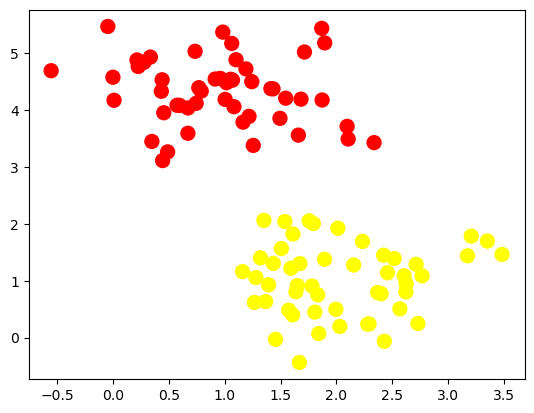

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2,
                 random_state = 0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
plt.show()

### A straight line can be drawn to separate the classes but there are multiple of such

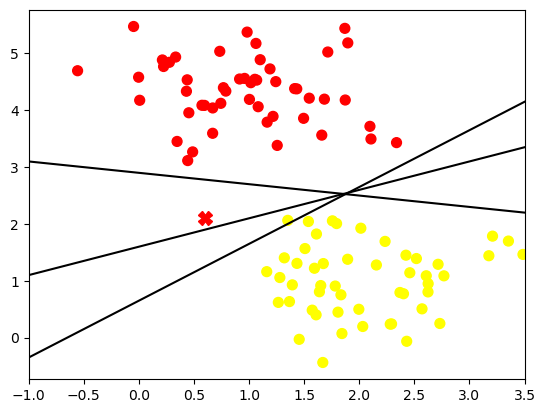

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'X', color='red',  markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### the simple assumption that a line can be drawn to segregate classes aren't enough since a new datapoint 'x' will belong to different classes depending on the line drawn

### The support vector machine provides a way to improve that. Instead of drawing just a line without any width, we can draw a line with some width/ margin around it up to the nearest points( support vector)

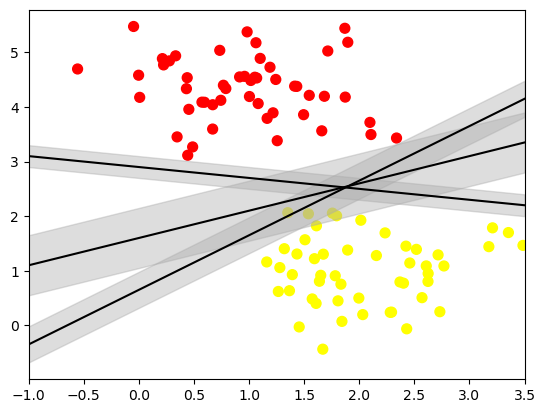

In [13]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### The line that maximizes the margin is the optimal model

## Fiting the support vector machine

In [15]:
from sklearn.svm import SVC # the support vector classifier
model = SVC(kernel= 'linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

###  Creating a function to visualize SVC in action, plot the decision boundaries

In [18]:
def plot_svc_decision_function(model,ax=None, plot_support=True):
    # plot the decision function for a 2D SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot the decision boundary
    ax.contour(X, Y, P, colors='k',
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

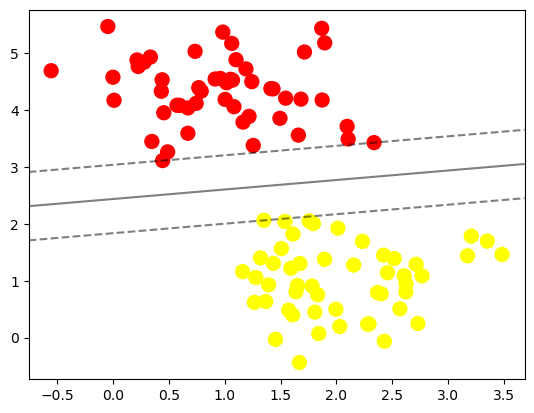

In [19]:
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='autumn')
plot_svc_decision_function(model)

### This line maximizes the margin between the two classes
### In sk-learn , the identity of the support vectors are stored in the support_vectors_  attribute of the classifier

In [20]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])